<a href="https://colab.research.google.com/github/dbalstjr16/personalProject/blob/main/KoreanLotteryMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filepath = "https://raw.githubusercontent.com/dbalstjr16/personalProject/main/DATA_Korean_Lotto_20021207-20210424.csv"
data = pd.read_csv(filepath, index_col = "lottery")
data.head()

,date,num1,num2,num3,num4,num5,num6,bonus
lottery,,,,,,,,
1,2002-12-07,10,23,29,33,37,40,16
2,2002-12-14,9,13,21,25,32,42,2
3,2002-12-21,11,16,19,21,27,31,30
4,2002-12-28,14,27,30,31,40,42,2
5,2003-01-04,16,24,29,40,41,42,3


In [ ]:
columns = ["num1", "num2", "num3", "num4", "num5", "num6", "bonus"]
X = data.copy()
X["sum"] = X[columns].sum(axis=1)
X["range"] = X[columns].max(axis=1) - X[columns].min(axis=1)
X["average"] = X["sum"] / 7
X.head()

,date,num1,num2,num3,num4,num5,num6,bonus,sum,range,average
lottery,,,,,,,,,,,
1,2002-12-07,10,23,29,33,37,40,16,188,30,26.857143
2,2002-12-14,9,13,21,25,32,42,2,144,40,20.571429
3,2002-12-21,11,16,19,21,27,31,30,155,20,22.142857
4,2002-12-28,14,27,30,31,40,42,2,186,40,26.571429
5,2003-01-04,16,24,29,40,41,42,3,195,39,27.857143


In [ ]:
X['num1_next'] = X['num1'].shift(-1)
X['num2_next'] = X['num2'].shift(-1)
X['num3_next'] = X['num3'].shift(-1)
X['num4_next'] = X['num4'].shift(-1)
X['num5_next'] = X['num5'].shift(-1)
X['num6_next'] = X['num6'].shift(-1)

# Drop the last row because it will have NaN values after shifting
X = X.dropna()
y = X[['num1_next', 'num2_next', 'num3_next', 'num4_next', 'num5_next', 'num6_next']]

X_full = X[["average", "sum", "range"]]

print(X_full.head())
print(y.head())

           average  sum  range
lottery                       
1        26.857143  188     30
2        20.571429  144     40
3        22.142857  155     20
4        26.571429  186     40
5        27.857143  195     39
         num1_next  num2_next  num3_next  num4_next  num5_next  num6_next
lottery                                                                  
1              9.0       13.0       21.0       25.0       32.0       42.0
2             11.0       16.0       19.0       21.0       27.0       31.0
3             14.0       27.0       30.0       31.0       40.0       42.0
4             16.0       24.0       29.0       40.0       41.0       42.0
5             14.0       15.0       26.0       27.0       40.0       42.0


<ipython-input-36-34039a28b01f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num1_next'] = X['num1'].shift(-1)
<ipython-input-36-34039a28b01f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num2_next'] = X['num2'].shift(-1)
<ipython-input-36-34039a28b01f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

<Axes: xlabel='lottery', ylabel='sum'>

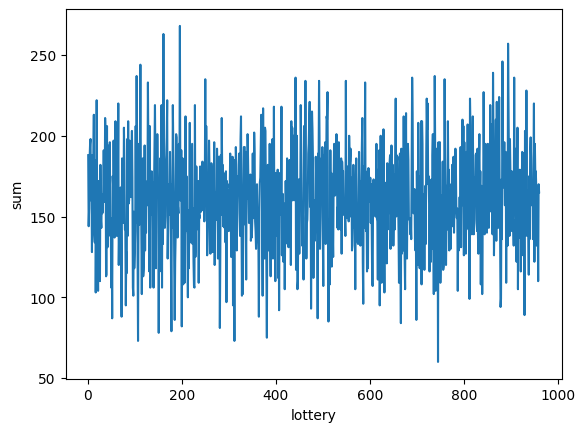

In [ ]:
#min sum = 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28
#max sum = 45 + 44 + 43 + 42 + 41 + 40 + 39 = 294
sns.lineplot(X["sum"])

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size = 0.2, random_state = 40)

model = XGBRegressor(n_estimators = 1000, learning_rate = 0.1, random_state = 42)
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

y_prediction = y_prediction.round().astype(int)
y_test = y_test.round().astype(int)

error = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {error}')

y_prediction = pd.DataFrame(y_prediction, columns=["Pred_1", "Pred_2", "Pred_3", "Pred_4", "Pred_5", "Pred_6"])
result = pd.concat([y_prediction, y_test.reset_index(drop=True)], axis=1)

print(result)

Mean Squared Error: 79.29805996472663
     Pred_1  Pred_2  Pred_3  Pred_4  Pred_5  Pred_6  num1_next  num2_next  \
0        11      14      18      28      29      36          4         12   
1         4       5      12      28      31      42          2          3   
2        11      17      22      32      33      42          4         16   
3         1      11      23      32      39      40         11         12   
4        14      20      28      27      43      45          7         17   
..      ...     ...     ...     ...     ...     ...        ...        ...   
184       1       9      11      13      21      40          7         11   
185       8      16      21      32      34      43          2          6   
186       6      12      24      32      27      39          2          4   
187      18      21      28      34      37      42          2         12   
188       4      15      21      21      21      33          2          5   

     num3_next  num4_next  num5_next 

In [ ]:
def compute_features(data):
    # Assuming data contains columns 'num1' through 'num6' and 'bonus'
    data['sum'] = data[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']].sum(axis=1)
    data['average'] = data[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']].mean(axis=1)
    data['range'] = data[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']].max(axis=1) - data[['num1', 'num2', 'num3', 'num4', 'num5', 'num6']].min(axis=1)
    return data[['average', 'sum', 'range']]

model = XGBRegressor(n_estimators = 1000, learning_rate = 0.1, random_state = 42)
model.fit(X_train, y_train)

latest_data = {
    'num1': [12],
    'num2': [23],
    'num3': [34],
    'num4': [45],
    'num5': [56],
    'num6': [67],
    'bonus': [8]
}

# Convert to DataFrame
X_new = pd.DataFrame(latest_data)

# Compute the features needed for prediction
X_new_features = compute_features(X_new)

# Predict using the model
y_pred = model.predict(X_new_features)


# Convert predictions to integers if necessary
y_pred_int = y_pred.round().astype(int)

# Convert to DataFrame for readability
y_pred_df = pd.DataFrame(y_pred_int, columns=["Pred_1", "Pred_2", "Pred_3", "Pred_4", "Pred_5", "Pred_6"])

print("Predicted numbers for the next draw:")
print(y_pred_df)

Predicted numbers for the next draw:
   Pred_1  Pred_2  Pred_3  Pred_4  Pred_5  Pred_6
0      17      18      26      34      41      46
